# 04. Data Sources and Transformations
http://nbviewer.jupyter.org/github/bokeh/bokeh-notebooks/blob/master/tutorial/04%20-%20Data%20Sources%20and%20Transformations.ipynb

In [8]:
import pandas as pd
from pandas import DataFrame

from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

## Overview
We've seen how Bokeh can work well with Python lists, NumPy arrays, Pandas series, etc. At lower levels, these inputs are converted to a Bokeh ColumnDataSource. This data type is the central data source object used throughout Bokeh. Although Bokeh often creates them for us transparently, there are times when it is useful to create them explicitly.

In later sections we will see features like hover tooltips, computed transforms, and CustomJS interactions that make use of the ColumnDataSource, so let's take a quick look now.

### Creating with Python Dicts
The ColumnDataSource can be imported from bokeh.models: 

In [1]:
from bokeh.models import ColumnDataSource

In [3]:
source = ColumnDataSource(data={
    'x' : [1, 2, 3, 4, 5],
    'y' : [3, 7, 8, 5, 1],
})

source.data

{'x': [1, 2, 3, 4, 5], 'y': [3, 7, 8, 5, 1]}

In [6]:
DataFrame(source.data)

,x,y
0,1,3
1,2,7
2,3,8
3,4,5
4,5,1


In [9]:
p = figure(plot_width=400, plot_height=400)
p.circle('x', 'y', size=20, source=source)
show(p)

## Creating with Pandas DataFrames

In [10]:
from bokeh.sampledata.iris import flowers as df

source = ColumnDataSource(df)

In [11]:
p = figure(plot_width=400, plot_height=400)
p.circle('petal_length', 'petal_width', source=source)
show(p)

In [16]:
# Exercise: create a column data source with the autompg sample data frame and plot it

from bokeh.sampledata.autompg import autompg_clean as df

source = ColumnDataSource(data=df)
DataFrame(source.data).tail(2)

,accel,cyl,displ,hp,index,mfr,mpg,name,origin,weight,yr
390,18.6,4,120.0,79,390,ford,28.0,ford ranger,North America,2625,82
391,19.4,4,119.0,82,391,chevrolet,31.0,chevy s-10,North America,2720,82


C:\Softwares\Python\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F6D3A402B0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001F6D43EE080>]], dtype=object)

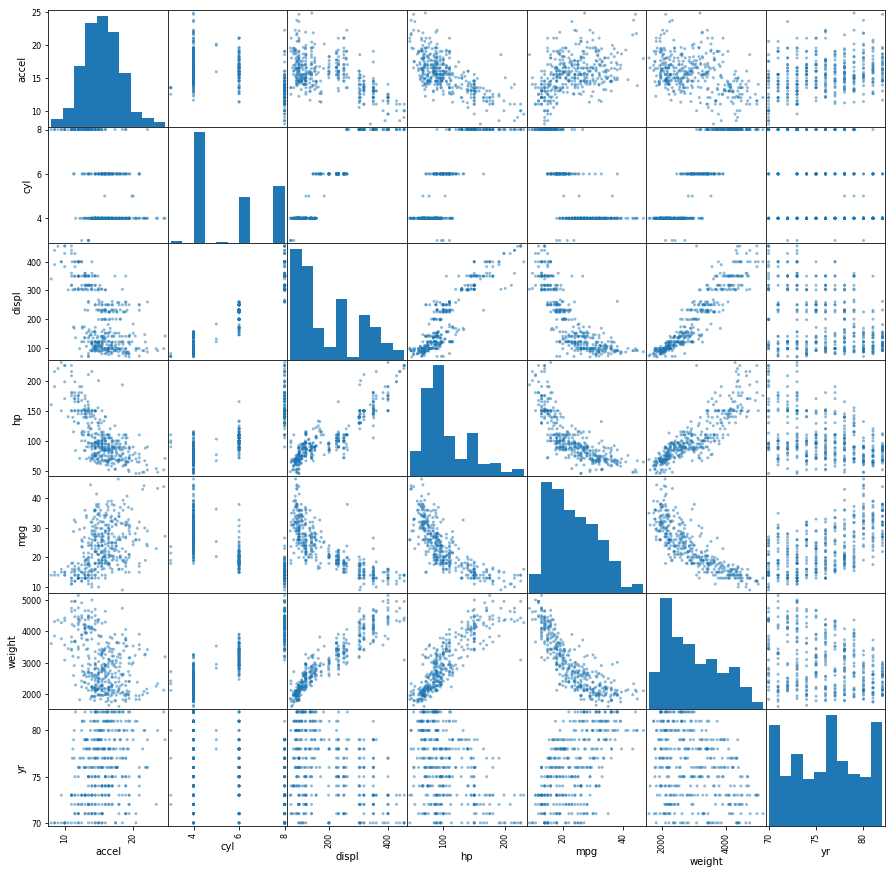

In [21]:
from pandas.tools.plotting import scatter_matrix

scatter_matrix(df[['accel', 'cyl', 'displ', 'hp', 'mpg', 'weight', 'yr']], figsize = (15, 15))

In [22]:
p = figure(plot_width=400, plot_height=400)
p.circle('weight', 'hp', source=source)
show(p)